# 1 EDA (Exploratory Data Analysis)

## 1.1 EDA data description
### Visualization of data relationships, data types, null and NaN values, duplicates, and unique values present in each column, along with descriptive insights.
### Obs.: The **orders** table has the column **dias_since_prior_order**, which is documented with the name **dias_since_prior** in the task pdf, it will be considered the official name present in the table and not in the .pdf doc

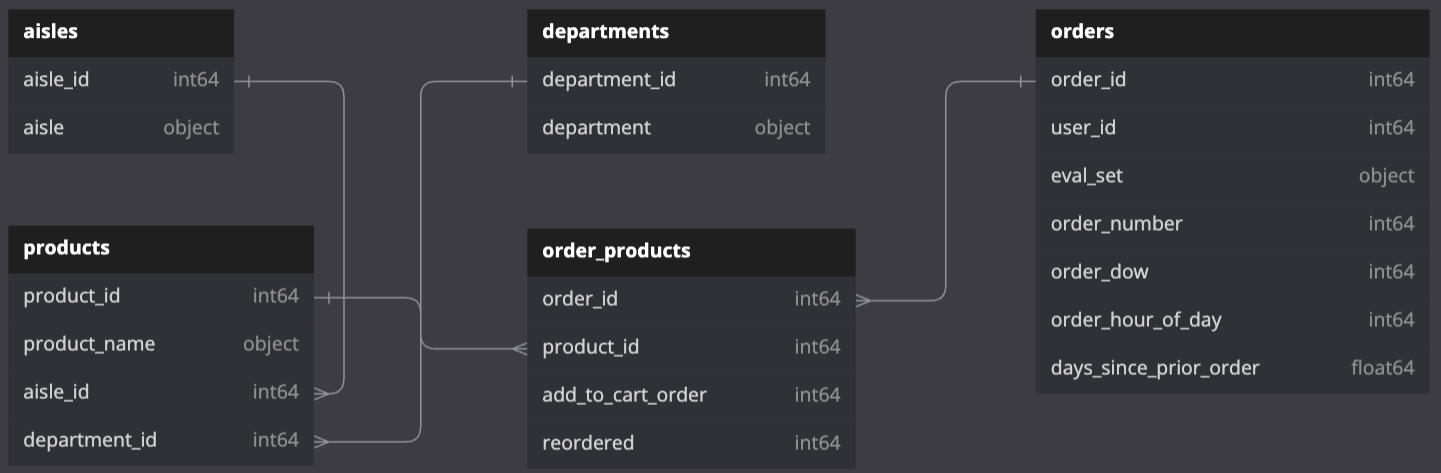

In [2]:
from IPython.display import display, Image
path_img = '/Users/marcobispo/Documents/Bees-Data-Challenge/data_schema.png'
display(Image(filename=path_img))

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
def read_multiple_csv(file_paths, names):
    if len(file_paths) != len(names):
        raise ValueError("The length of file_paths and names must be the same.")
    dataframes = {}
    for file_path, name in zip(file_paths, names):
        dataframes[name] = pd.read_csv(file_path)
    return dataframes
file_path = '/Users/marcobispo/Documents/Bees-Data-Challenge/Data-Challenge-V/online-shopping-dataset/'
file_paths = [file_path+'aisles.csv',
                file_path+'departments.csv',
                file_path+'order_products.csv',
                file_path+'orders.csv',
                file_path+'products.csv']
names = ['aisles', 'departments', 'order_products','orders','products']
dfs = read_multiple_csv(file_paths, names)
import pandas as pd
dict_quality_data = {
    'df_name': [],
    'column_name': [],
    'column_type': [],
    'NaN': [],
    'null': [],
    'duplicates':[],
    'uniques':[],
    'size':[],
    'describe':[]
}
dict_describe = {
    'aisles':{
        'aisle_id':'Uniquely identifies each aisle',
        'aisle':'Contains the name of the aisle'
    },
    'departments':{
        'department_id': 'Provides a unique identifier for each department',
        'department': 'Displays the name of the department'
    },
    'order_products':{
        'order_id':'Serves as a foreign key, linking to the unique order identifier',
        'product_id':'Functions as a foreign key, connecting to the unique product identifier',
        'add_to_cart_order': 'Reflects the order in which each product was added to the shopping cart',
        'reordered': 'Takes a value of 1 if the product has been ordered by the same user in the past, or 0 if not'
    },
    'orders':{
        'order_id': 'Uniquely identifies each order',
        'user_id': 'Identifies the customer associated with the order',
        'eval_set': 'Denotes the category to which this order belongs (refer to the SET descriptions below)'
            'The "SET" variable corresponds to one of two evaluation sets described below:'
            '■ "prior": Encompasses orders that occurred before the user\'s most recent order (approximately 3.2 million orders).'
            '■ "train": Comprises the training data supplied to participants (around 131,000 orders).',
        'order_number': "Represents the sequence number of the order for a user, where 1'denotes the first order and 'n' indicates the nth order",
        'order_dow': 'Indicates the day of the week when the order was placed',
        'order_hour_of_day': 'Specifies the hour at which the order was initiated',
        'days_since_prior_order': "Records the number of days that have elapsed since the user's previous order, capped at 30 days (with 'NAs' for the first order)"
        #days_since_prior:
    },
    'products':{
        'product_id': 'Serves as a unique identifier for each product',
        'product_name': 'Provides the name of the product',
        'aisle_id': 'Acts as a reference key for the aisle associated with the product',
        'department_id': 'Acts as a reference key for the department in which the product belongs'
    }
}
for name_df, df in dfs.items():
    for col in df.columns:
        series = df[col]
        n_nan = series.isna().sum()
        n_null = series.isnull().sum()
        duplicates = series.duplicated().sum()
        uniques = series.nunique()
        size = len(series)
        dict_quality_data['df_name'].append(name_df)
        dict_quality_data['column_name'].append(col)
        dict_quality_data['column_type'].append(series.dtype)
        dict_quality_data['NaN'].append(n_nan)
        dict_quality_data['null'].append(n_null)
        dict_quality_data['duplicates'].append(duplicates)
        dict_quality_data['uniques'].append(uniques)
        dict_quality_data['size'].append(size)
        dict_quality_data['describe'].append(dict_describe[name_df][col])
df_quality_data = pd.DataFrame(dict_quality_data)
display(df_quality_data)

,df_name,column_name,column_type,NaN,null,duplicates,uniques,size,describe
0,aisles,aisle_id,int64,0,0,0,134,134,Uniquely identifies each aisle
1,aisles,aisle,object,0,0,0,134,134,Contains the name of the aisle
2,departments,department_id,int64,0,0,0,21,21,Provides a unique identifier for each department
3,departments,department,object,0,0,0,21,21,Displays the name of the department
4,order_products,order_id,int64,0,0,30473023,3346083,33819106,"Serves as a foreign key, linking to the unique order identifier"
5,order_products,product_id,int64,0,0,33769421,49685,33819106,"Functions as a foreign key, connecting to the unique product identifier"
6,order_products,add_to_cart_order,int64,0,0,33818961,145,33819106,Reflects the order in which each product was added to the shopping cart
7,order_products,reordered,int64,0,0,33819104,2,33819106,"Takes a value of 1 if the product has been ordered by the same user in the past, or 0 if not"
8,orders,order_id,int64,0,0,0,3346083,3346083,Uniquely identifies each order
9,orders,user_id,int64,0,0,3139874,206209,3346083,Identifies the customer associated with the order


In [3]:
for name_df, df in dfs.items():
    print(name_df)
    display(df.head(2))

aisles


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses


departments


,department_id,department
0,1,frozen
1,2,other


order_products


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1


orders


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


products


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13


## 1.2 EDA data check
### Quick check to verify if the data descriptions match what is actually present in the dataframe otherwise, cleaning will be necessary.
### The description perfectly matches the data being analyzed however, the count of days of the week is starting from zero, for hours it makes sense, but for days not so much, but 7 values ​​are present within the list

In [33]:
reordered = dfs['order_products']['reordered'].unique().tolist()
reordered.sort()
print("dfs['order_products']['reordered']")
print(reordered)
order_number = dfs['orders']['order_number'].unique().tolist()
order_number.sort()
print("dfs['orders']['order_number']")
print(order_number)
order_dow = dfs['orders']['order_dow'].unique().tolist()
order_dow.sort()
print("dfs['orders']['order_dow']")
print(order_dow)
order_hour_of_day = dfs['orders']['order_hour_of_day'].unique().tolist()
order_hour_of_day.sort()
print("dfs['orders']['order_hour_of_day']")
print(order_hour_of_day)
days_since_prior_order = dfs['orders']['days_since_prior_order'].unique().tolist()
days_since_prior_order.sort()
print("dfs['orders']['days_since_prior_order']")
print(days_since_prior_order)

dfs['order_products']['reordered']
[0, 1]
dfs['orders']['order_number']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
dfs['orders']['order_dow']
[0, 1, 2, 3, 4, 5, 6]
dfs['orders']['order_hour_of_day']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
dfs['orders']['days_since_prior_order']
[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0]


## 1.3 Data Visualization:
### Which product had the biggest sales and reordered?
#### Bananas and Bananas
### Which aisle had the biggest sales and reordered?
#### Fresh vegetables and fresh fruits
### Which department had the highest sales and reordered?
#### produce anda produce
### Which user ID had the highest sales and reordered?
#### 129928 and 201268
### Which days_since_prior_order of the week sell the most?
### 7
### Which order_dow of the month sell the most?
#### 0
### Which order_hour_of_day sell the most?
### 10 hours
#### Note: eval_set equals prior that mens the clients really buy the products ?	

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
df_order_products_products = pd.merge(dfs['order_products'], dfs['products'], on='product_id', how='left')
df_order_products_products_aisles = pd.merge(df_order_products_products, dfs['aisles'], on='aisle_id', how='left')
df_order_products_products_aisles_departments = pd.merge(df_order_products_products_aisles, dfs['departments'], on='department_id', how='left')
df_order_products_products_aisles_departments_orders = pd.merge(df_order_products_products_aisles_departments, dfs['orders'], on='order_id', how='left')
df_order_products_products_aisles_departments_orders = df_order_products_products_aisles_departments_orders[df_order_products_products_aisles_departments_orders['eval_set'] == 'prior']
df_visualization = df_order_products_products_aisles_departments_orders[["department","add_to_cart_order","reordered","product_name","aisle","eval_set","order_dow","order_hour_of_day","days_since_prior_order","user_id"]]
display(df_visualization)

,department,add_to_cart_order,reordered,product_name,aisle,eval_set,order_dow,order_hour_of_day,days_since_prior_order,user_id
0,dairy eggs,1,1,Organic Egg Whites,eggs,prior,5,9,8.0,202279
1,produce,2,1,Michigan Organic Kale,fresh vegetables,prior,5,9,8.0,202279
2,pantry,3,0,Garlic Powder,spices seasonings,prior,5,9,8.0,202279
3,pantry,4,1,Coconut Butter,oils vinegars,prior,5,9,8.0,202279
4,pantry,5,0,Natural Sweetener,baking ingredients,prior,5,9,8.0,202279
...,...,...,...,...,...,...,...,...,...,...
32434484,household,6,1,Free & Clear Natural Dishwasher Detergent,dish detergents,prior,2,6,21.0,25247
32434485,snacks,7,0,Organic Mini Sandwich Crackers Peanut Butter,crackers,prior,2,6,21.0,25247
32434486,frozen,8,0,All Natural French Toast Sticks,frozen breakfast,prior,2,6,21.0,25247
32434487,produce,9,1,Banana,fresh fruits,prior,2,6,21.0,25247


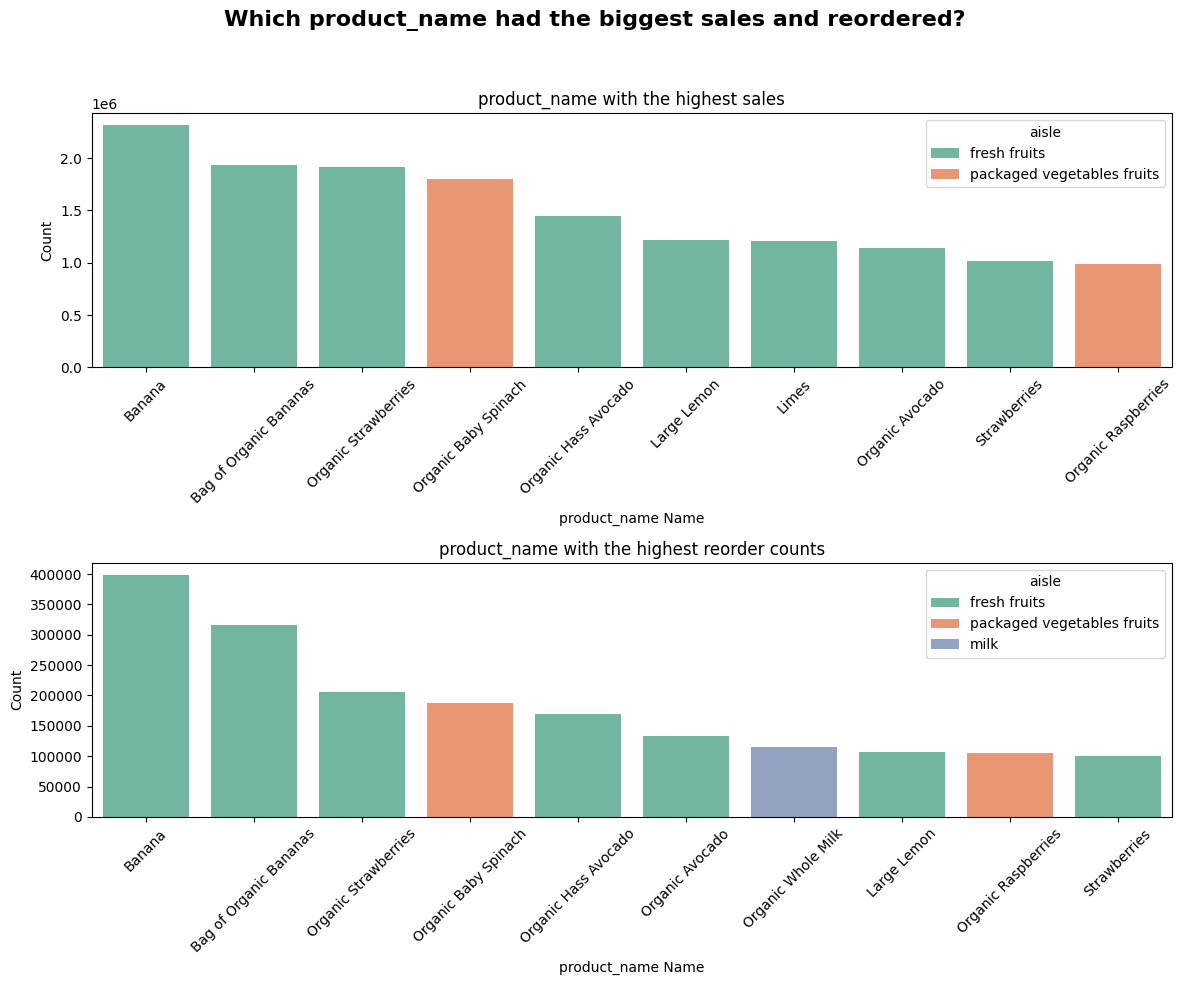

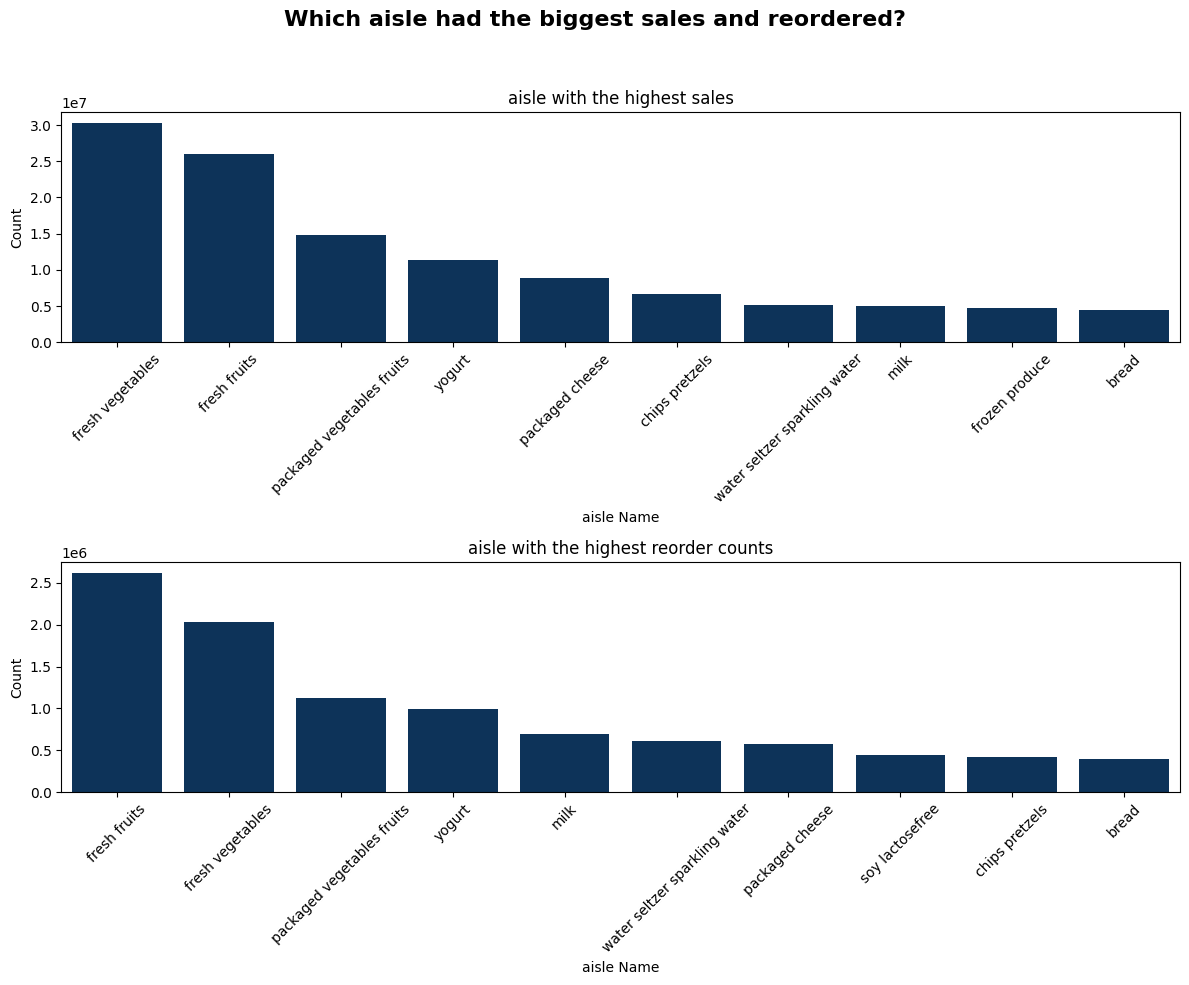

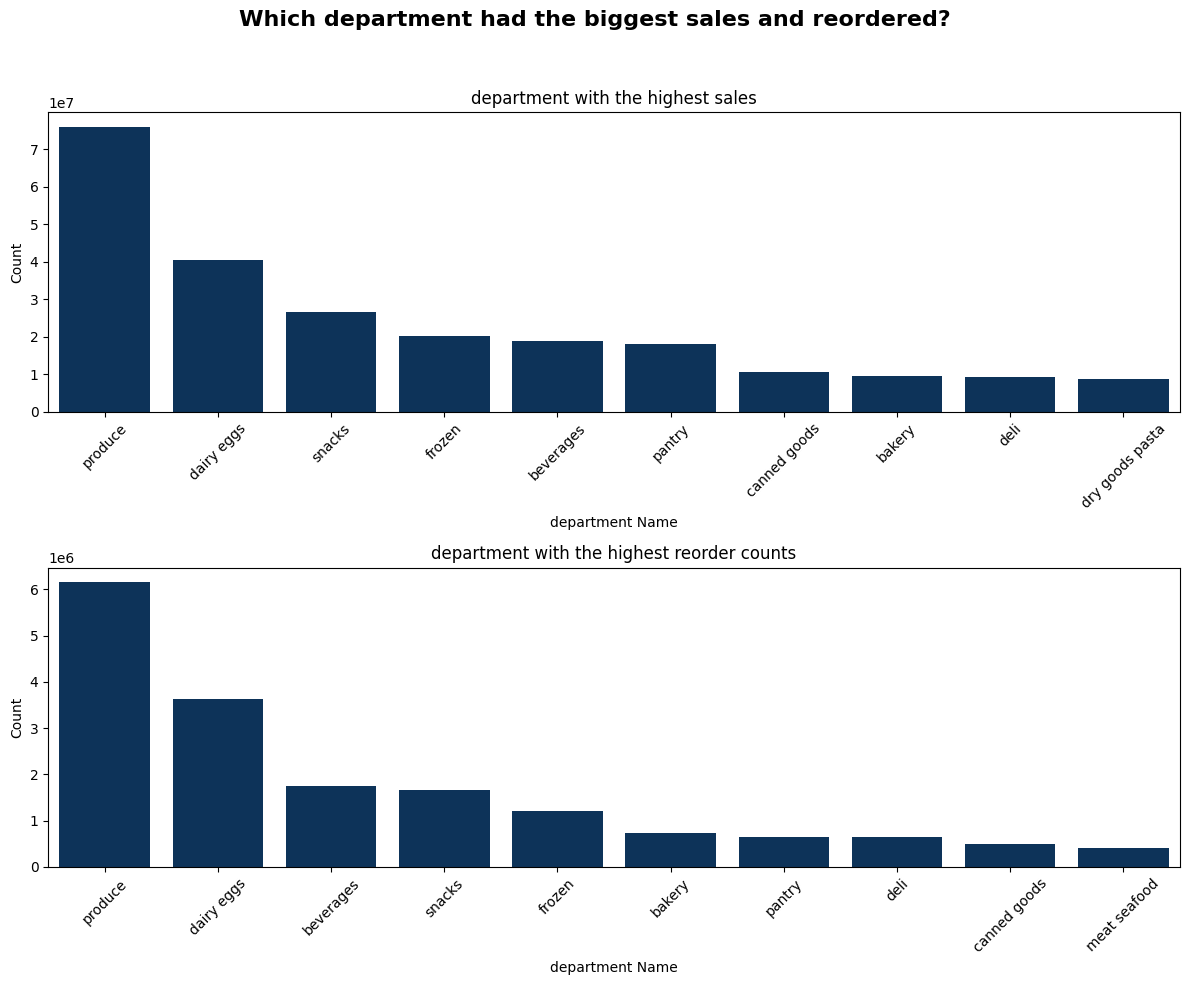

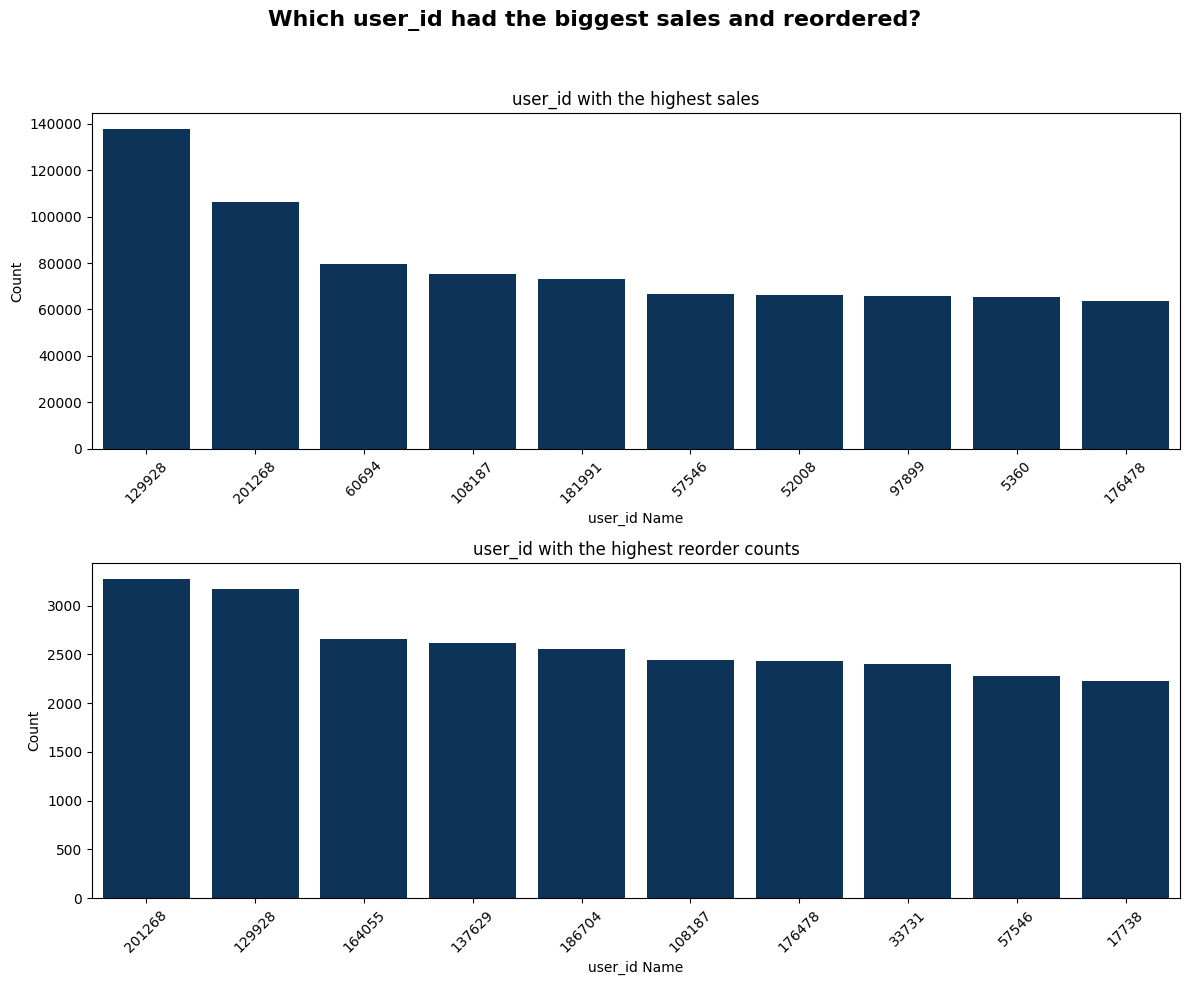

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def bar_plot_which(x, y1, y2, df, subtitle1, subtitle2, title, hue=None):
    plt.figure(figsize=(12, 10))
    

    plt.subplot(2, 1, 1)
    if hue:
        df_visualization_q2_1 = df.groupby([x,hue])[y1].sum().reset_index()
    else:
        df_visualization_q2_1 = df.groupby([x])[y1].sum().reset_index()
    df_visualization_q2_1 = df_visualization_q2_1.sort_values(by=y1, ascending=False).iloc[:10]
    if hue:
        ax1 = sns.barplot(x=x, y=y1, hue=hue, data=df_visualization_q2_1, dodge=False, palette='Set2', order=df_visualization_q2_1[x])
    else:
        ax1 = sns.barplot(x=x, y=y1, data=df_visualization_q2_1, dodge=False, color='#003366', order=df_visualization_q2_1[x])
    ax1.set_title(subtitle1)
    ax1.set_xlabel(x + ' Name')
    ax1.set_ylabel('Count')
    ax1.set_xticks(range(len(df_visualization_q2_1)))
    ax1.set_xticklabels(df_visualization_q2_1[x], rotation=45)
    

    plt.subplot(2, 1, 2)
    if hue:
        df_visualization_q2_2 = df.groupby([x,hue])[y2].sum().reset_index()
    else:
        df_visualization_q2_2 = df.groupby([x])[y2].sum().reset_index()
    df_visualization_q2_2 = df_visualization_q2_2.sort_values(by=y2, ascending=False).iloc[:10]
    if hue:
        ax2 = sns.barplot(x=x, y=y2, hue=hue, data=df_visualization_q2_2, dodge=False, palette='Set2', order=df_visualization_q2_2[x])
    else:
        ax2 = sns.barplot(x=x, y=y2, data=df_visualization_q2_2, dodge=False, color='#003366', order=df_visualization_q2_2[x])
    ax2.set_title(subtitle2)
    ax2.set_xlabel(x + ' Name')
    ax2.set_ylabel('Count')
    ax2.set_xticks(range(len(df_visualization_q2_2)))
    ax2.set_xticklabels(df_visualization_q2_2[x], rotation=45)
    
    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



x = 'product_name'
y1 = 'add_to_cart_order'
y2 = 'reordered'
hue = 'aisle'
subtitle1 = (f"{x} with the highest sales")
subtitle2 = (f"{x} with the highest reorder counts")
title = (f"Which {x} had the biggest sales and reordered?")
bar_plot_which(x, y1, y2, df_visualization, subtitle1, subtitle2, title, hue)

x = 'aisle'
y1 = 'add_to_cart_order'
y2 = 'reordered'
subtitle1 = (f"{x} with the highest sales")
subtitle2 = (f"{x} with the highest reorder counts")
title = (f"Which {x} had the biggest sales and reordered?")
bar_plot_which(x, y1, y2, df_visualization, subtitle1, subtitle2, title)

x = 'department'
y1 = 'add_to_cart_order'
y2 = 'reordered'
hue = 'aisle'
subtitle1 = (f"{x} with the highest sales")
subtitle2 = (f"{x} with the highest reorder counts")
title = (f"Which {x} had the biggest sales and reordered?")
bar_plot_which(x, y1, y2, df_visualization, subtitle1, subtitle2, title)

x = 'user_id'
y1 = 'add_to_cart_order'
y2 = 'reordered'
hue = 'aisle'
subtitle1 = (f"{x} with the highest sales")
subtitle2 = (f"{x} with the highest reorder counts")
title = (f"Which {x} had the biggest sales and reordered?")
bar_plot_which(x, y1, y2, df_visualization, subtitle1, subtitle2, title)

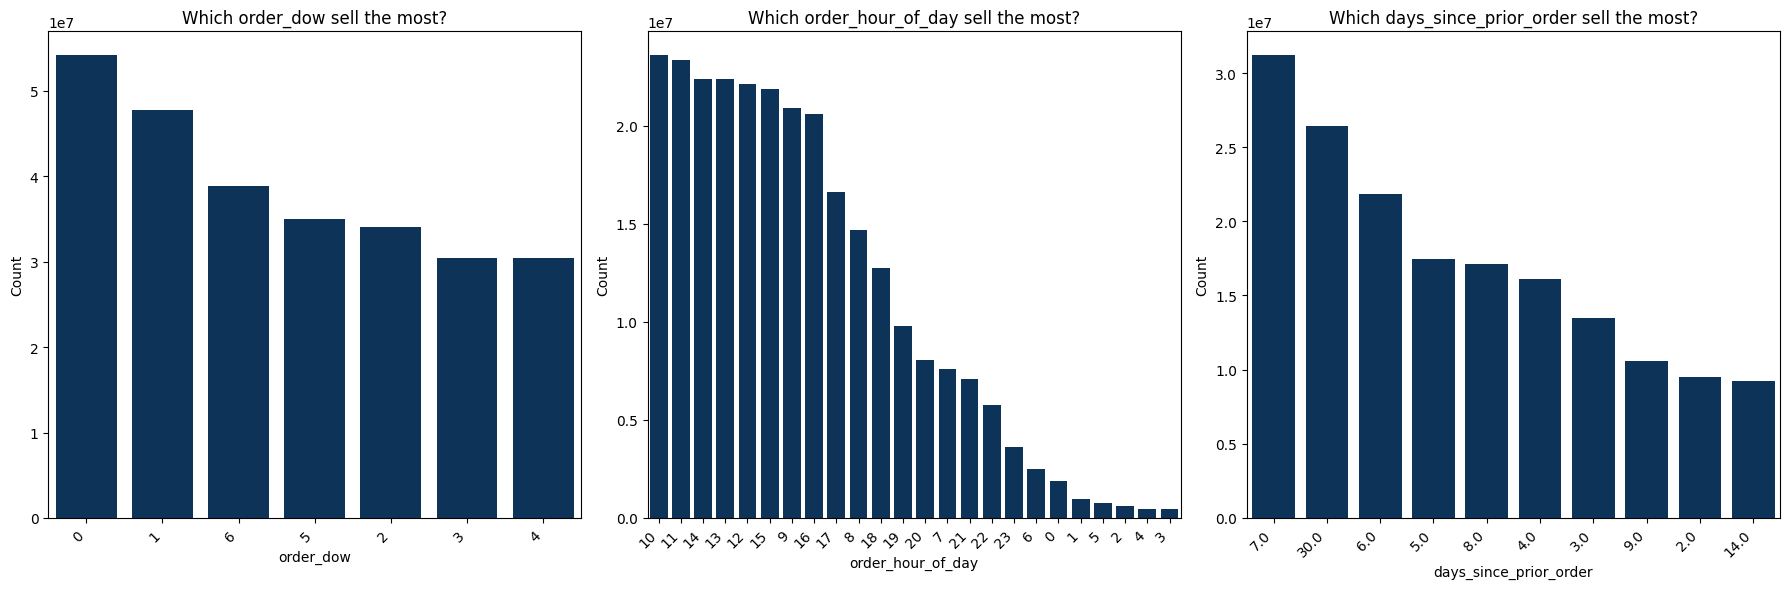

In [36]:
def bar_plot_which_time(x, y1, df, title, size, hue=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 10))
    
    if hue:
        df_agg = df.groupby([x, hue])[y1].sum().reset_index()
    else:
        df_agg = df.groupby(x)[y1].sum().reset_index()
    
    df_top = df_agg.sort_values(by=y1, ascending=False).iloc[:size]
    
    if hue:
        sns.barplot(x=x, y=y1, hue=hue, data=df_top, dodge=False, palette='Set2', order=df_top[x], ax=ax)
    else:
        sns.barplot(x=x, y=y1, data=df_top, dodge=False, color='#003366', order=df_top[x], ax=ax)
    
    ax.set_title(title)
    ax.set_xlabel(x)
    ax.set_ylabel('Count')
    
    ax.set_xticks(range(len(df_top[x])))
    ax.set_xticklabels(df_top[x], rotation=45, ha='right')
    
    if hue:
        ax.legend(title=hue)
    
    plt.tight_layout()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

params = [
    {'x': 'order_dow', 'y1': 'add_to_cart_order', 'title': 'Which order_dow sell the most?', 'size': 10},
    {'x': 'order_hour_of_day', 'y1': 'add_to_cart_order', 'title': 'Which order_hour_of_day sell the most?', 'size': 24},
    {'x': 'days_since_prior_order', 'y1': 'add_to_cart_order', 'title': 'Which days_since_prior_order sell the most?', 'size': 10}
]

for i, param in enumerate(params):
    bar_plot_which_time(param['x'], param['y1'], df_visualization, param['title'], param['size'], ax=axes[i])

plt.tight_layout()
plt.show()


# 2 Statistical analysis
### Note: It is not possible to carry out poison studies due to the lack of the year of registration.
### Poisson is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if those events occur with a known constant average rate and regardless of the time since the last event, in which case product sales, I would suggest a study to increase sales probabilities using order_dow, order_hour_of_day, days_since_prior_order

## 2.1 Descriptive Statistics Statistical graphs
### 

In [ ]:
df_order_products_products_aisles_departments_orders.head(3)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0


In [52]:
df_order_products_products_aisles_departments_orders['department'].unique()

array(['dairy eggs', 'produce', 'pantry', 'meat seafood', 'bakery',
       'personal care', 'snacks', 'breakfast', 'beverages', 'deli',
       'household', 'international', 'dry goods pasta', 'frozen',
       'canned goods', 'babies', 'pets', 'alcohol', 'bulk', 'missing',
       'other'], dtype=object)

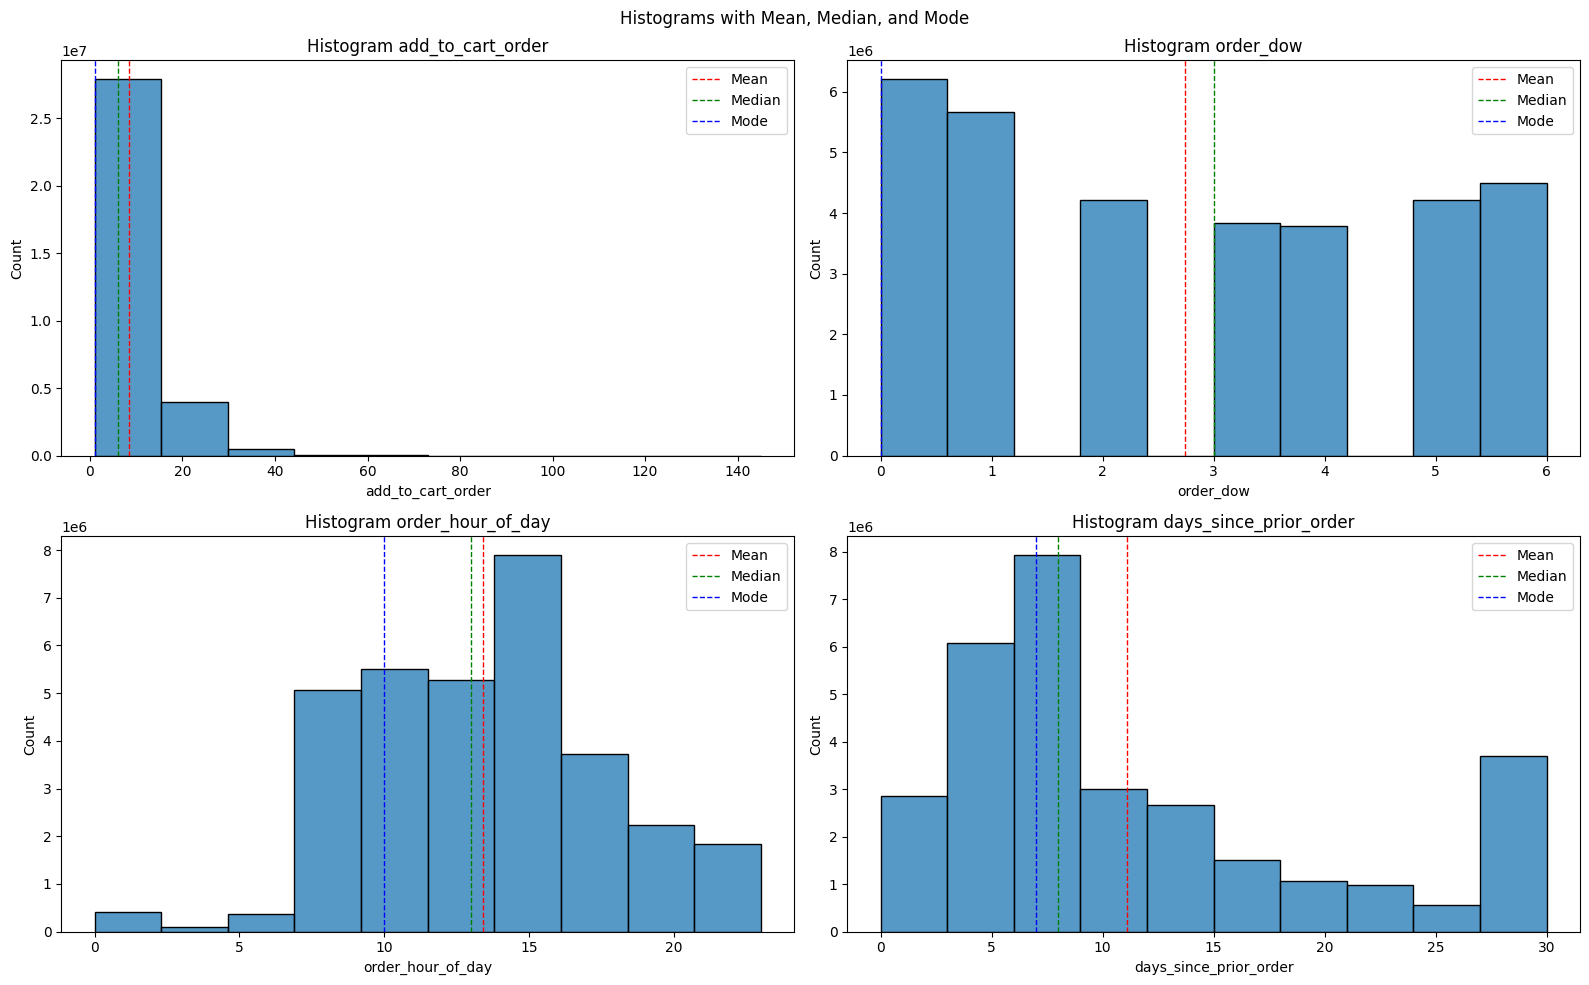

In [66]:
plt.figure(figsize=(16, 10))


plt.subplot(2, 2, 1)
sns.histplot(data=df_order_products_products_aisles_departments_orders, x="add_to_cart_order", bins=10)
plt.axvline(df_order_products_products_aisles_departments_orders['add_to_cart_order'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df_order_products_products_aisles_departments_orders['add_to_cart_order'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(df_order_products_products_aisles_departments_orders['add_to_cart_order'].mode()[0], color='blue', linestyle='dashed', linewidth=1, label='Mode')
plt.title('Histogram add_to_cart_order')
plt.legend()


plt.subplot(2, 2, 2)
sns.histplot(data=df_order_products_products_aisles_departments_orders, x="order_dow", bins=10)
plt.axvline(df_order_products_products_aisles_departments_orders['order_dow'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df_order_products_products_aisles_departments_orders['order_dow'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(df_order_products_products_aisles_departments_orders['order_dow'].mode()[0], color='blue', linestyle='dashed', linewidth=1, label='Mode')
plt.title('Histogram order_dow')
plt.legend()


plt.subplot(2, 2, 3)
sns.histplot(data=df_order_products_products_aisles_departments_orders, x="order_hour_of_day", bins=10)
plt.axvline(df_order_products_products_aisles_departments_orders['order_hour_of_day'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df_order_products_products_aisles_departments_orders['order_hour_of_day'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(df_order_products_products_aisles_departments_orders['order_hour_of_day'].mode()[0], color='blue', linestyle='dashed', linewidth=1, label='Mode')
plt.title('Histogram order_hour_of_day')
plt.legend()


plt.subplot(2, 2, 4)
sns.histplot(data=df_order_products_products_aisles_departments_orders, x="days_since_prior_order", bins=10)
plt.axvline(df_order_products_products_aisles_departments_orders['days_since_prior_order'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df_order_products_products_aisles_departments_orders['days_since_prior_order'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(df_order_products_products_aisles_departments_orders['days_since_prior_order'].mode()[0], color='blue', linestyle='dashed', linewidth=1, label='Mode')
plt.title('Histogram days_since_prior_order')
plt.legend()


plt.suptitle('Histograms with Mean, Median, and Mode')
plt.tight_layout()
plt.show()

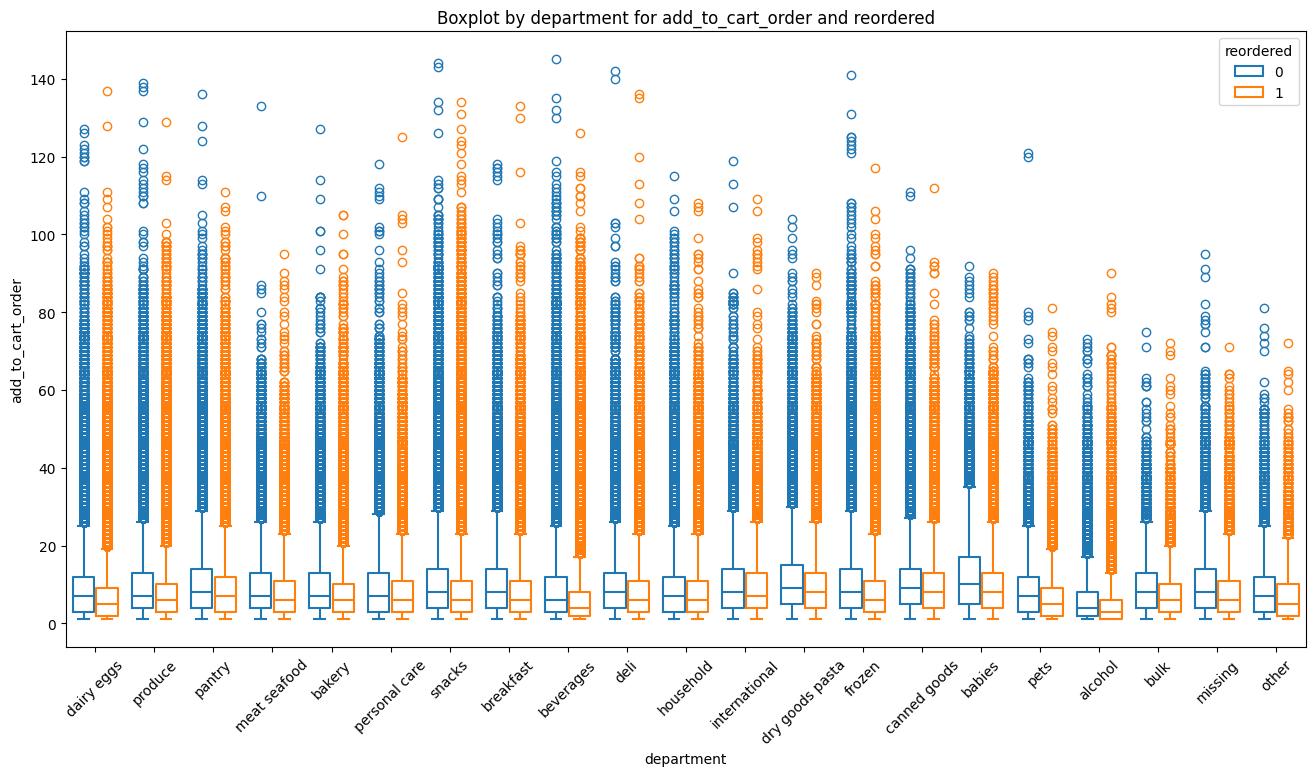

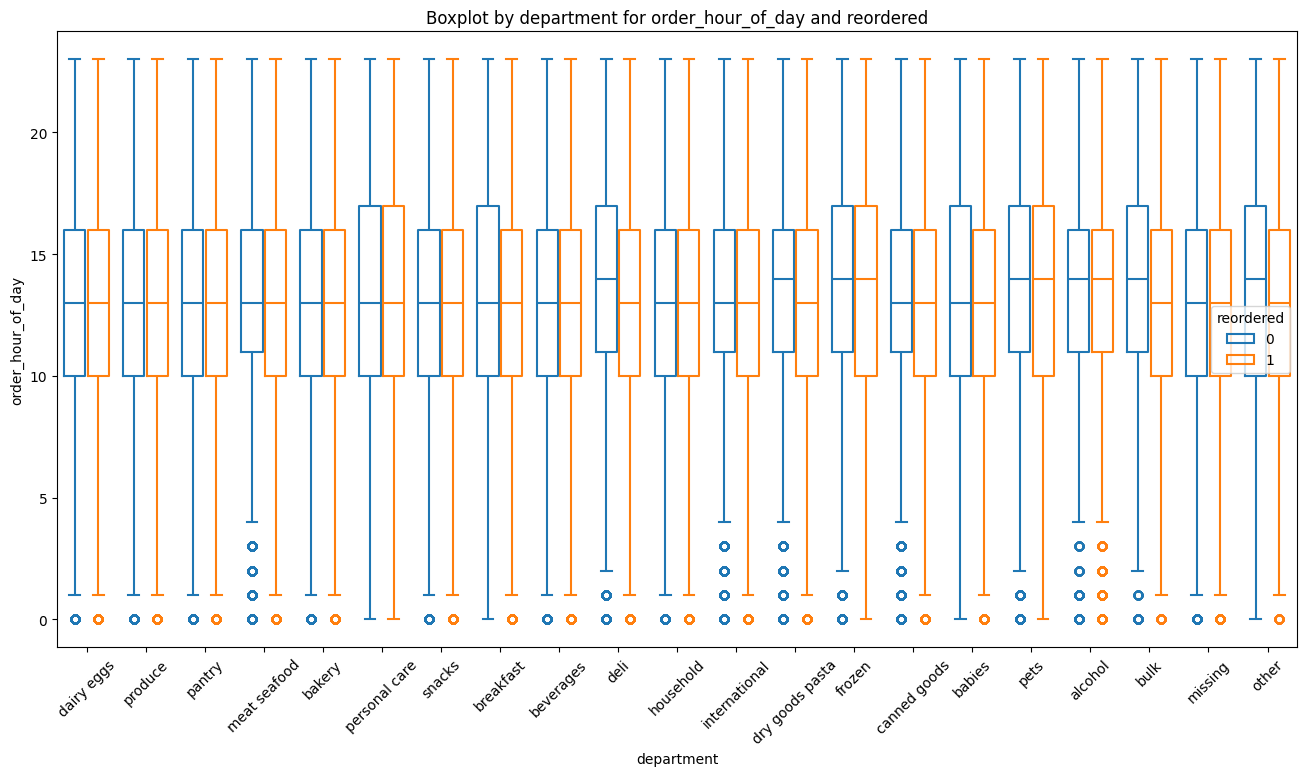

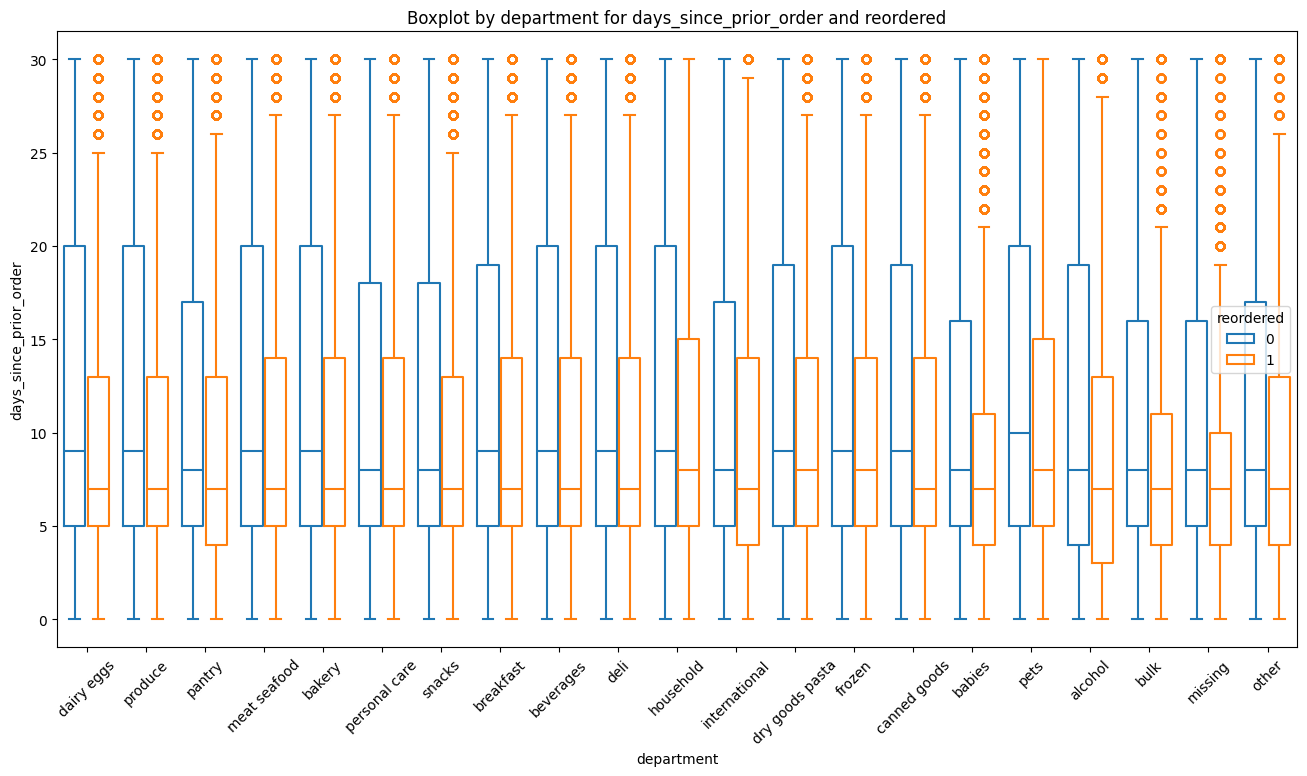

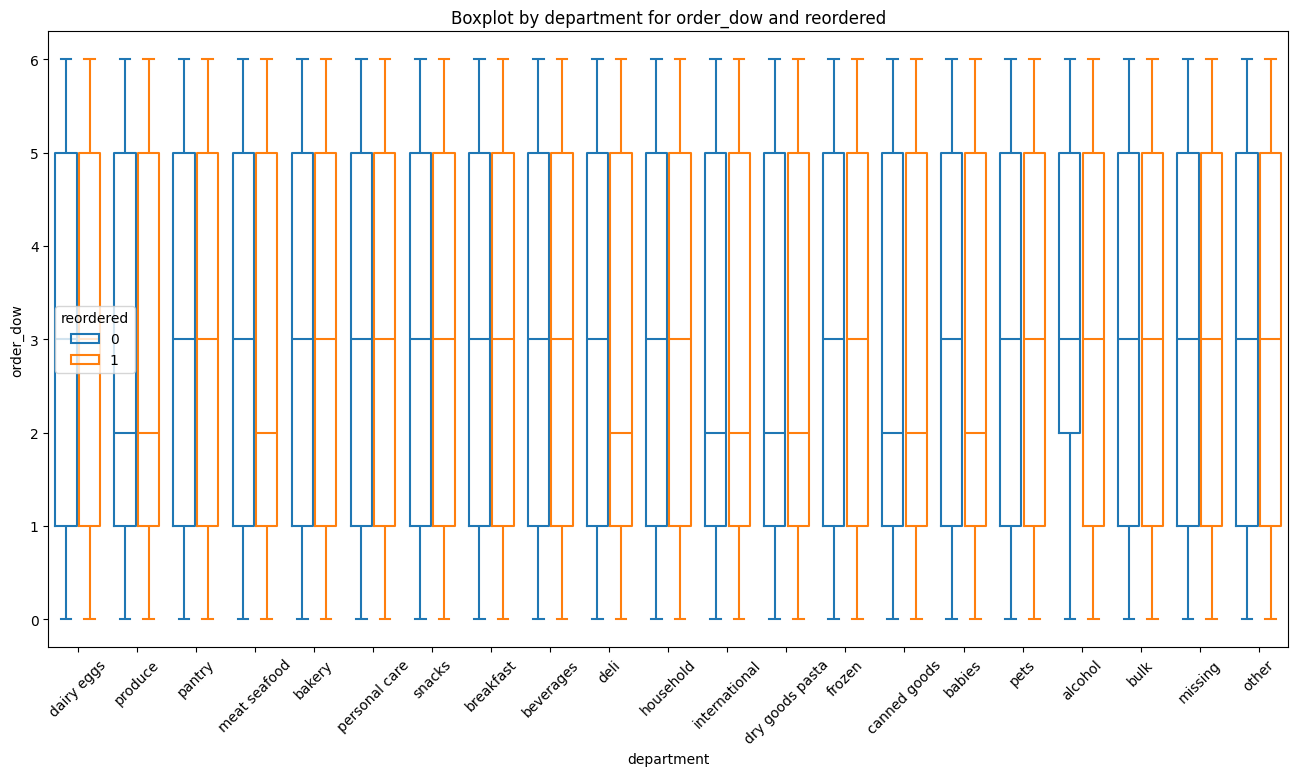

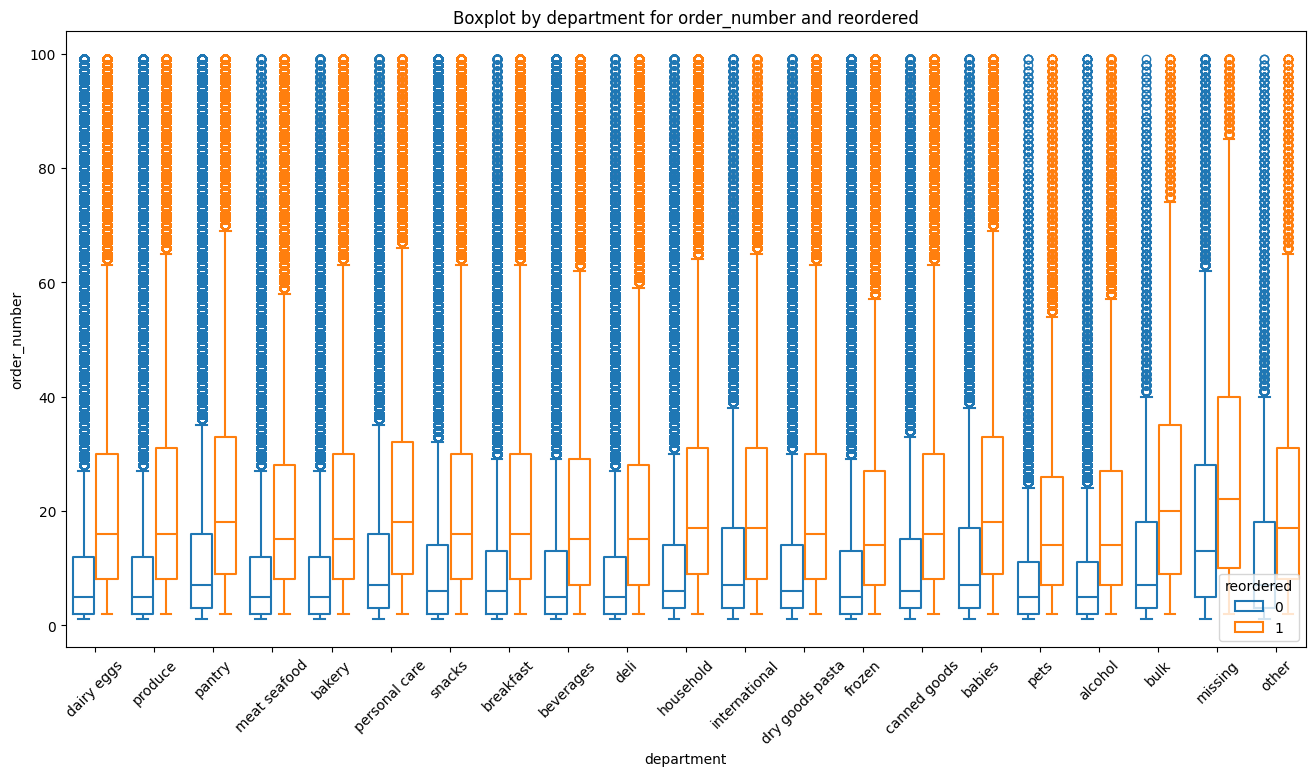

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot_by_department(data, x, y, hue, title):
    plt.figure(figsize=(16, 8))
    sns.boxplot(data=data, x=x, y=y, hue=hue, fill=False, gap=0.1)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

plot_boxplot_by_department(df_order_products_products_aisles_departments_orders,
                            "department", "add_to_cart_order", "reordered",
                            "Boxplot by department for add_to_cart_order and reordered")

plot_boxplot_by_department(df_order_products_products_aisles_departments_orders,
                            "department", "order_hour_of_day", "reordered",
                            "Boxplot by department for order_hour_of_day and reordered")

plot_boxplot_by_department(df_order_products_products_aisles_departments_orders,
                            "department", "days_since_prior_order", "reordered",
                            "Boxplot by department for days_since_prior_order and reordered")

plot_boxplot_by_department(df_order_products_products_aisles_departments_orders,
                            "department", "order_dow", "reordered",
                            "Boxplot by department for order_dow and reordered")

plot_boxplot_by_department(df_order_products_products_aisles_departments_orders,
                            "department", "order_number", "reordered",
                            "Boxplot by department for order_number and reordered")


In [53]:
df_order_products_products_aisles_departments_orders['aisle'].unique()

array(['eggs', 'fresh vegetables', 'spices seasonings', 'oils vinegars',
       'baking ingredients', 'doughs gelatins bake mixes', 'spreads',
       'packaged vegetables fruits', 'yogurt', 'soy lactosefree',
       'poultry counter', 'bread', 'breakfast bakery', 'cold flu allergy',
       'energy granola bars', 'breakfast bars pastries', 'chips pretzels',
       'trail mix snack mix', 'crackers', 'refrigerated',
       'energy sports drinks', 'fresh fruits', 'salad dressing toppings',
       'prepared soups salads', 'milk', 'paper goods',
       'water seltzer sparkling water', 'kosher foods',
       'packaged poultry', 'packaged cheese', 'instant foods',
       'packaged produce', 'cookies cakes', 'candy chocolate',
       'body lotions soap', 'dry pasta', 'laundry',
       'air fresheners candles', 'frozen produce', 'buns rolls',
       'canned fruit applesauce', 'juice nectars', 'granola',
       'fresh herbs', 'baby food formula', 'canned meals beans', 'cream',
       'meat counte

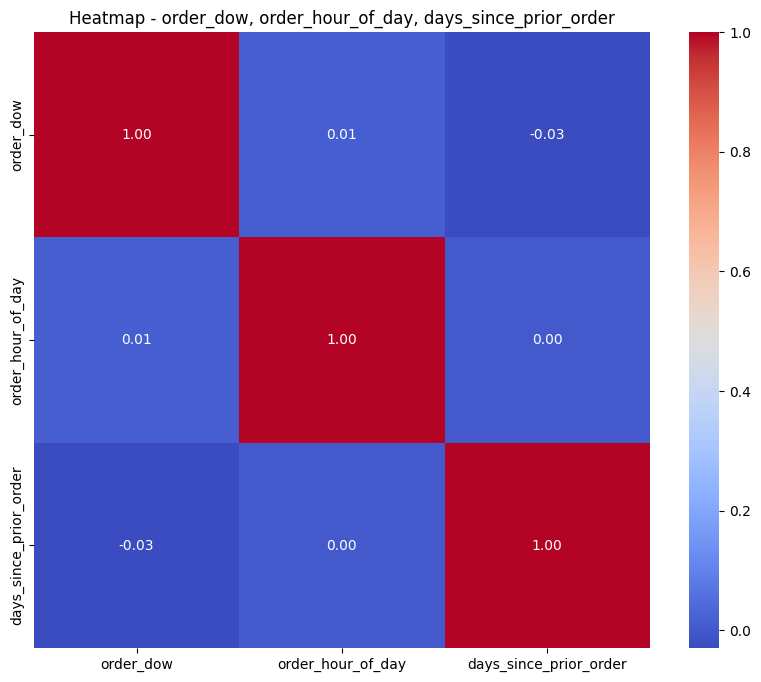

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
data = df_order_products_products_aisles_departments_orders[['order_number','order_dow', 'order_hour_of_day', 'days_since_prior_order']]
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True,
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.title('Heatmap - order_dow, order_hour_of_day, days_since_prior_order')
plt.show()

## 2.2 Inferential Statistics Hypothesis testing

### 2.2.1 Teste de proporção (Teste t para proporções):
#### A proporção de pedidos reordenados é significativamente diferente entre dois grupos, por exemplo, entre dois dias da semana ou entre diferentes horas do dia.


### 2.2.2 ANOVA (Análise de Variância):
#### Comparar a média de uma variável contínua (como o número de dias desde o último pedido) entre dois grupos independentes, como diferentes dias da semana ou diferentes horas do dia.

### 2.2.3 Teste de correlação (Pearson, Spearman):
#### Investigar a relação entre variáveis, como a correlação entre o número de produtos no carrinho (add_to_cart_order) e o número de dias desde o último pedido (days_since_prior).

### 2.2.4 Teste qui-quadrado:
#### Investigar a relação entre variáveis, como a correlação entre o número de produtos no carrinho (add_to_cart_order) e o número de dias desde o último pedido (days_since_prior).



### 2.2.1 Proportion test (t-test for proportions):
#### The proportion of reordered orders is significantly different between two groups, for example between two days of the week or between different times of the day.

### 2.2.2 ANOVA (Analysis of Variance):
#### Compare the mean of a continuous variable (such as the number of days since the last order) between two independent groups, such as different days of the week or different times of the day.

### 2.2.3 Correlation test (Pearson, Spearman):
#### Investigate the relationship between variables, such as the spectacular one between the number of products in the cart (add_to_cart_order) and the number of days since the last order (days_since_prior).

### 2.2.4 Chi-square test:
#### Investigate the relationship between variables, such as the spectacular one between the number of products in the cart (add_to_cart_order) and the number of days since the last order (days_since_prior).

### 2.2.1 Teste de proporção (Teste t para proporções):
#### A proporção de pedidos reordenados é significativamente diferente entre dois grupos, por exemplo, entre dois dias da semana ou entre diferentes horas do dia.

In [72]:
df_order_products_products_aisles_departments_orders.head(3)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0


## 2.3 Inferential Statistics Principal Component Analysis (PCA)
### BETWEEN t-SNE, MDS e PCA, WHY PCA ?
### O objetivo principal for reduzir a dimensionalidade enquanto se retém a máxima variância possível nos dados.
### A interpretação direta dos componentes for importante.
### A eficiência computacional for um fator crítico.

In [74]:
df_order_products_products_aisles_departments_orders.head(2)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0


In [95]:
df_pca_feed = df_order_products_products_aisles_departments_orders[['department','add_to_cart_order',
                                                            'reordered','order_number',
                                                            'order_dow','order_hour_of_day',
                                                            'days_since_prior_order']].copy() 
df_pca_feed['days_since_prior_order'] += 1
df_pca_feed['days_since_prior_order'] = df_pca_feed['days_since_prior_order'].fillna(0)
df_pca_feed = pd.get_dummies(df_pca_feed, columns=['department'])
df_pca_feed

,add_to_cart_order,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order,department_alcohol,department_babies,department_bakery,department_beverages,...,department_household,department_international,department_meat seafood,department_missing,department_other,department_pantry,department_personal care,department_pets,department_produce,department_snacks
0,1,1,3,5,9,9.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,3,5,9,9.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,3,0,3,5,9,9.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,4,1,3,5,9,9.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,5,0,3,5,9,9.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,6,1,24,2,6,22.0,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
32434485,7,0,24,2,6,22.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
32434486,8,0,24,2,6,22.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32434487,9,1,24,2,6,22.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [98]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

df_pca_feed = df_order_products_products_aisles_departments_orders[['department','add_to_cart_order',
                                                            'reordered','order_number',
                                                            'order_dow','order_hour_of_day',
                                                            'days_since_prior_order']].copy() 
df_pca_feed['days_since_prior_order'] += 1
df_pca_feed['days_since_prior_order'] = df_pca_feed['days_since_prior_order'].fillna(0)
df_pca_feed = pd.get_dummies(df_pca_feed, columns=['department'])
df_pca_feed


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca_feed)

# Aplicação do PCA
pca = PCA(n_components=2)  # Defina o número de componentes principais desejados
principal_components = pca.fit_transform(scaled_data)

# Criação de um novo DataFrame com os componentes principais
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Variância explicada por cada componente
print('Variância explicada por cada componente:', pca.explained_variance_ratio_)

# Visualize o novo DataFrame com os componentes principais
print(df_pca)

Variância explicada por cada componente: [0.05638467 0.04865633]
               PC1       PC2
0         0.748482 -1.653859
1         1.050216  1.447514
2        -1.713378 -0.159243
3        -0.603993 -0.363820
4        -1.788106 -0.137297
...            ...       ...
32434484 -0.264555 -0.299098
32434485 -0.997756 -0.388561
32434486 -1.275368 -0.193433
32434487  0.992134  1.577110
32434488  0.036900 -0.571192

[32434489 rows x 2 columns]


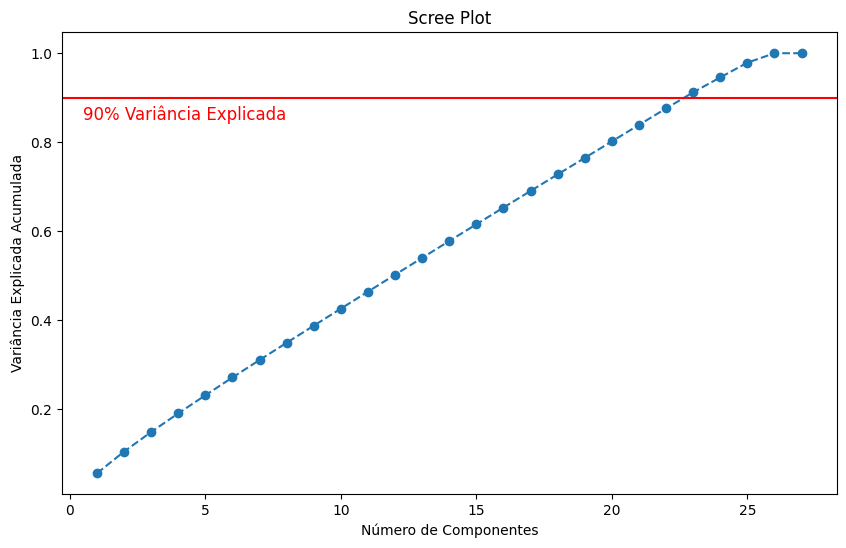

Número de componentes segundo o critério de Kaiser: 21


In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Suponha que 'data' seja seu DataFrame contendo os dados a serem analisados
X = df_pca_feed.values

# Padronizar os dados antes de aplicar PCA
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

# Aplicar PCA
pca = PCA().fit(X)

# Variância explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Variância acumulada
cumulative_variance = np.cumsum(explained_variance)

# Plot do Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Scree Plot')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% Variância Explicada', color = 'red', fontsize=12)
plt.show()

# Determinar o número de componentes com base no critério de Kaiser
num_components_kaiser = np.sum(pca.explained_variance_ > 1)
print(f"Número de componentes segundo o critério de Kaiser: {num_components_kaiser}")


# 3 Customer Segmentation: 
#### Can you segment customers based on their ordering behavior, such as frequency, time of day, or days since prior order, to better understand their preferences and propose ways to optimize marketing strategies?

# 4 Inventory Management:
### Inventory Management: Implement a predictive model that estimates inventory levels
### for individual products across different departments and aisles, taking into consideration the day of the week and hour. Please note the following points:
### Note 1 - The model should be predictive, not a forecasting model.
### Note 2 - Explain how this predictive model can be applied to optimize stock levels and minimize waste.

# 5 Order Fulfillment (Bonus points): 
### How can we optimize the order fulfillment process, considering factors like the day of the week and time of day when most orders are placed, to ensure timely and efficient deliveries to customers while minimizing operational costs?

### Classificar os produtos em velocidade de compra, estudar as distribuidoras que tem mais fluxo e comparar com as de menores fluxo e estudar comportamentos

#  6 Given the brevity of this exercise:
### outline the additional work/action items you would take to solve this challenge if you were given 2 additional weeks to complete the assignment.